In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

dts1=pd.read_excel(r"C:\Users\Priyal Agrahari\Downloads\OnlineRetail.xlsx")
dts1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [2]:
#cleaning the data
#remove missing data customer id
dts1.dropna(subset = ['CustomerID'], inplace=True)
#remove duplicates
dts1=dts1.drop_duplicates()
dts1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
#filter out cancelled data
# Remove rows where InvoiceNo starts with 'C'
dts1 = dts1[~dts1['InvoiceNo'].astype(str).str.startswith('C')]
dts1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
# Keep only rows with positive Quantity
dts1 = dts1[dts1['Quantity'] > 0]
dts1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
dts1['CustomerID']=dts1['CustomerID'].astype(int)
dts1['TotalSum'] = dts1['Quantity'] * dts1['UnitPrice']
dts1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [6]:
#rfm analysis
snapshot_date = dts1['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = dts1.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': lambda x: x.nunique(),
    'TotalSum': lambda x: x.sum()
})
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSum': 'Monetary'}, inplace=True)
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40
...,...,...,...
18280,278,1,180.60
18281,181,1,80.82
18282,8,2,178.05


In [11]:
# Recency: lower is better, so we reverse the score
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])

# Frequency: higher is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])

# Monetary: higher is better
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
CustomerID,,,,,,
12346,326,1,77183.60,1,1,5
12347,2,7,4310.00,5,5,5
12348,75,4,1797.24,2,4,4
12349,19,1,1757.55,4,1,4
12350,310,1,334.40,1,1,2
...,...,...,...,...,...,...
18280,278,1,180.60,1,2,1
18281,181,1,80.82,1,2,1
18282,8,2,178.05,5,3,1


In [7]:
#Normalization(using standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

rfm_scaled = rfm[['Recency', 'Frequency', 'Monetary']].copy()
rfm_scaled[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm_scaled[['Recency', 'Frequency', 'Monetary']])

rfm[['Recency_Std', 'Frequency_Std', 'Monetary_Std']] = rfm_scaled
rfm


,Recency,Frequency,Monetary,Recency_Std,Frequency_Std,Monetary_Std
CustomerID,,,,,,
12346,326,1,77183.60,2.334858,-0.424675,8.363977
12347,2,7,4310.00,-0.905199,0.354080,0.251779
12348,75,4,1797.24,-0.175186,-0.035297,-0.027938
12349,19,1,1757.55,-0.735196,-0.424675,-0.032357
12350,310,1,334.40,2.174855,-0.424675,-0.190780
...,...,...,...,...,...,...
18280,278,1,180.60,1.854850,-0.424675,-0.207901
18281,181,1,80.82,0.884833,-0.424675,-0.219008
18282,8,2,178.05,-0.845198,-0.294882,-0.208185


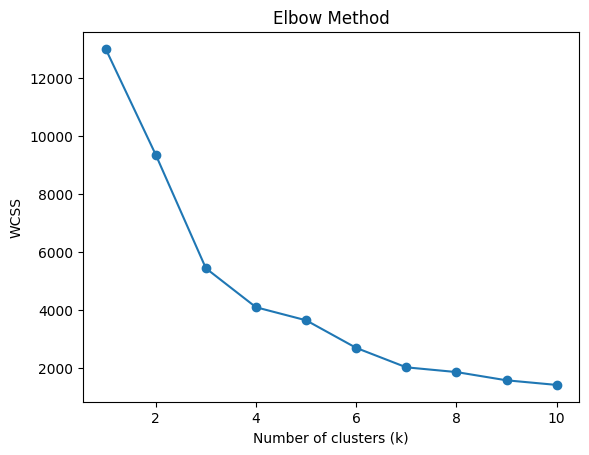

In [8]:
#elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


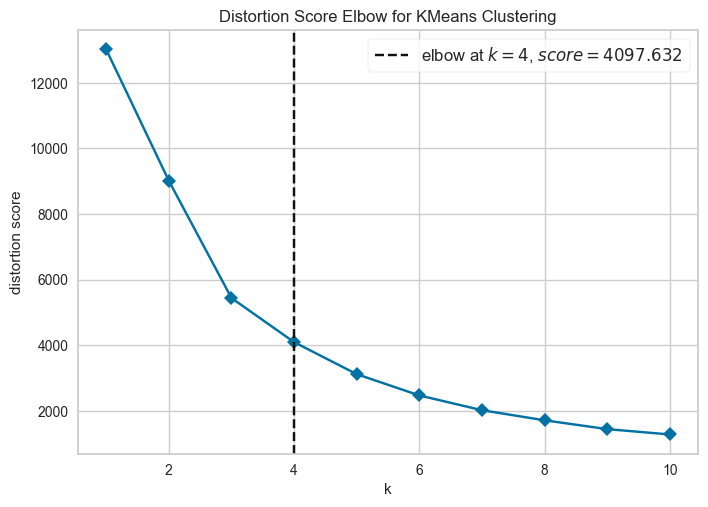

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 11), timings=False)
visualizer.fit(rfm_scaled)
visualizer.show()



In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(rfm_scaled)
rfm_scaled['Cluster'] = kmeans.labels_  # Assign cluster labels (0-3)

rfm_scaled

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,2.334858,-0.424675,8.363977,0
12347,-0.905199,0.354080,0.251779,3
12348,-0.175186,-0.035297,-0.027938,3
12349,-0.735196,-0.424675,-0.032357,3
12350,2.174855,-0.424675,-0.190780,1
...,...,...,...,...
18280,1.854850,-0.424675,-0.207901,1
18281,0.884833,-0.424675,-0.219008,1
18282,-0.845198,-0.294882,-0.208185,3


In [12]:
cluster_means = rfm_scaled.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()
print(cluster_means)


   Cluster   Recency  Frequency   Monetary
0        0 -0.768467   2.307119   1.156253
1        1  1.560485  -0.353057  -0.174980
2        2 -0.851352  10.178375  13.930399
3        3 -0.486086  -0.079979  -0.078361


In [15]:
# Example mapping (adjust based on your recency definition)
segment_map = {
    0: 'Champions',
    1: 'Loyal Customers',
    2: 'At Risk',
    3: 'Potential Loyalists'
}
# If your cluster labels are different, adjust the mapping
rfm_scaled['Segment'] = rfm_scaled['Cluster'].map(segment_map)
rfm_scaled


,Recency,Frequency,Monetary,Cluster,Segment
CustomerID,,,,,
12346,2.334858,-0.424675,8.363977,0,Champions
12347,-0.905199,0.354080,0.251779,3,Potential Loyalists
12348,-0.175186,-0.035297,-0.027938,3,Potential Loyalists
12349,-0.735196,-0.424675,-0.032357,3,Potential Loyalists
12350,2.174855,-0.424675,-0.190780,1,Loyal Customers
...,...,...,...,...,...
18280,1.854850,-0.424675,-0.207901,1,Loyal Customers
18281,0.884833,-0.424675,-0.219008,1,Loyal Customers
18282,-0.845198,-0.294882,-0.208185,3,Potential Loyalists


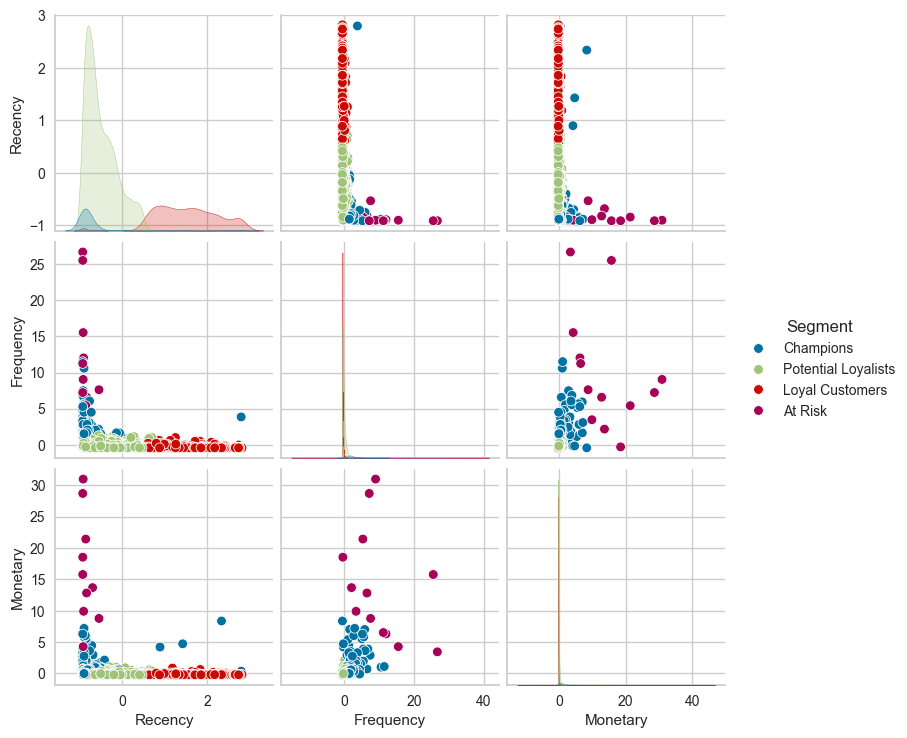

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(rfm_scaled, hue='Segment', vars=['Recency', 'Frequency', 'Monetary'])
plt.show()



In [27]:
segment_counts = rfm_scaled['Segment'].value_counts()
segment_counts = rfm_scaled['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']  # Explicitly name columns
segment_counts


,Segment,Count
0,Potential Loyalists,3053
1,Loyal Customers,1062
2,Champions,211
3,At Risk,13


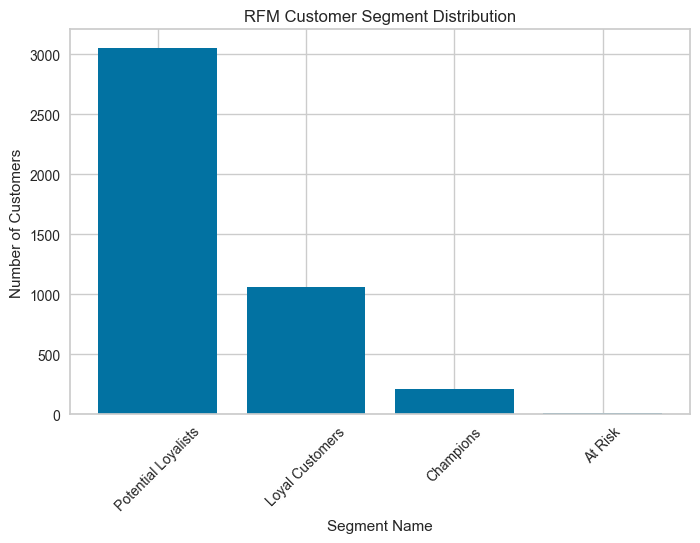

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(segment_counts['Segment'], segment_counts['Count'])
plt.title('RFM Customer Segment Distribution')
plt.xlabel('Segment Name')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


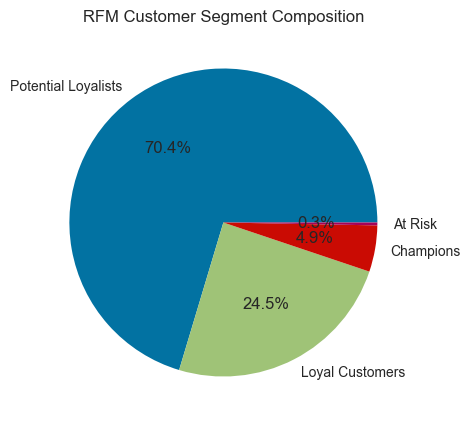

In [30]:
plt.figure(figsize=(8, 5))
plt.pie(segment_counts['Count'], labels=segment_counts['Segment'], autopct='%1.1f%%')
plt.title('RFM Customer Segment Composition')
plt.show()

  # Should include 'Segment'


In [32]:
segment_means = rfm_scaled.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
print(segment_means)



               Segment   Recency  Frequency   Monetary
0              At Risk -0.851352  10.178375  13.930399
1            Champions -0.768467   2.307119   1.156253
2      Loyal Customers  1.560485  -0.353057  -0.174980
3  Potential Loyalists -0.486086  -0.079979  -0.078361


In [33]:
##Cohort Analysis
dts1['InvoiceMonth'] = dts1['InvoiceDate'].dt.to_period('M')



In [36]:
##Find the first purchase month for each customer (cohort):
dts1['CohortMonth'] =dts1.groupby('CustomerID')['InvoiceMonth'].transform('min')
dts1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12,2011-08
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12,2011-08
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011-08
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011-08


In [38]:
#cohort index (months since first purchase):
dts1['CohortIndex'] = (dts1['InvoiceMonth'] - dts1['CohortMonth']).apply(lambda x: x.n)

In [41]:
#Count unique customers per cohort and index:


cohort_counts = dts1.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_table = cohort_counts.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_table

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#Calculate retention rates:
cohort_sizes = cohort_table.iloc[:, 0]
retention = cohort_table.divide(cohort_sizes, axis=0)
retention


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


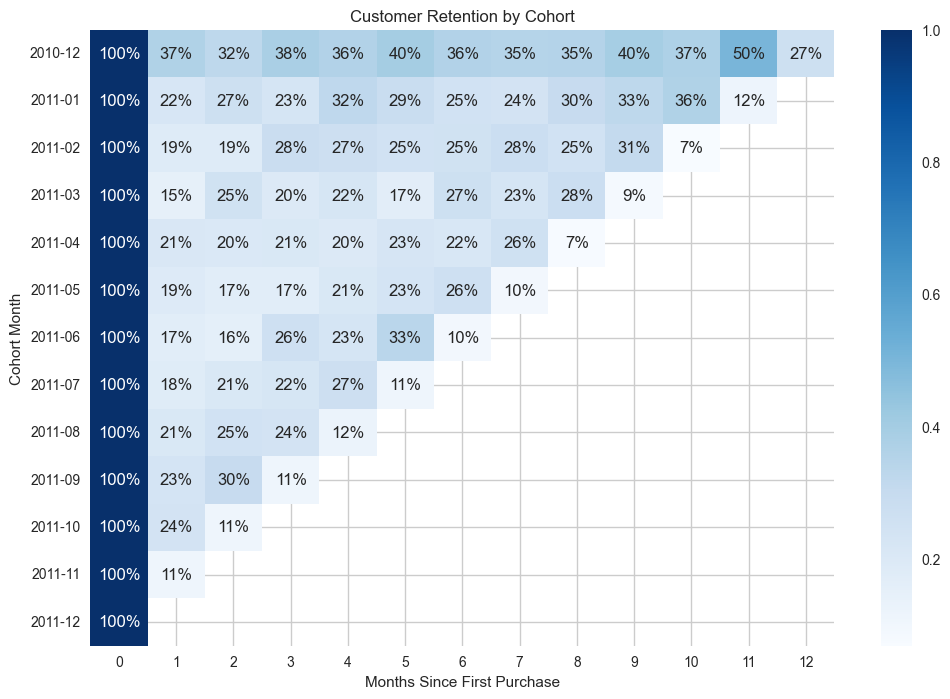

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.title('Customer Retention by Cohort')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()
